In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt


C:\Users\ecao7\AppData\Local\Temp\ipykernel_18564\2252618497.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
data = pd.read_csv("Life Expectancy Data.csv")
data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


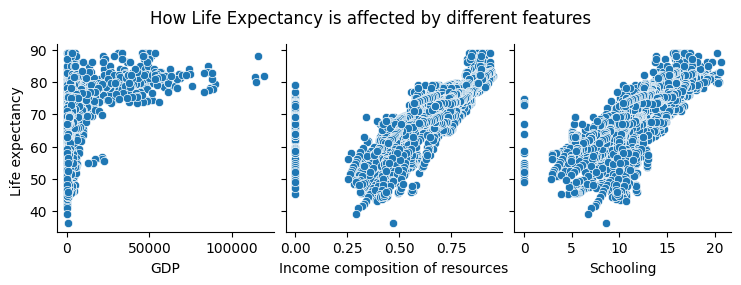

In [3]:
pplot = sns.pairplot(data,x_vars=['GDP','Income composition of resources', 'Schooling'],y_vars=['Life expectancy '])
fig = pplot.figure.suptitle("How Life Expectancy is affected by different features", y=1.1).get_figure()
# fig.savefig("pairplot.png",bbox_inches="tight")

In [4]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
data_numeric = data.drop(columns=['Country','Status'])
correlations = data_numeric.corr()

Text(0.5, 1.0, 'Heatmap of Linear Correlations')

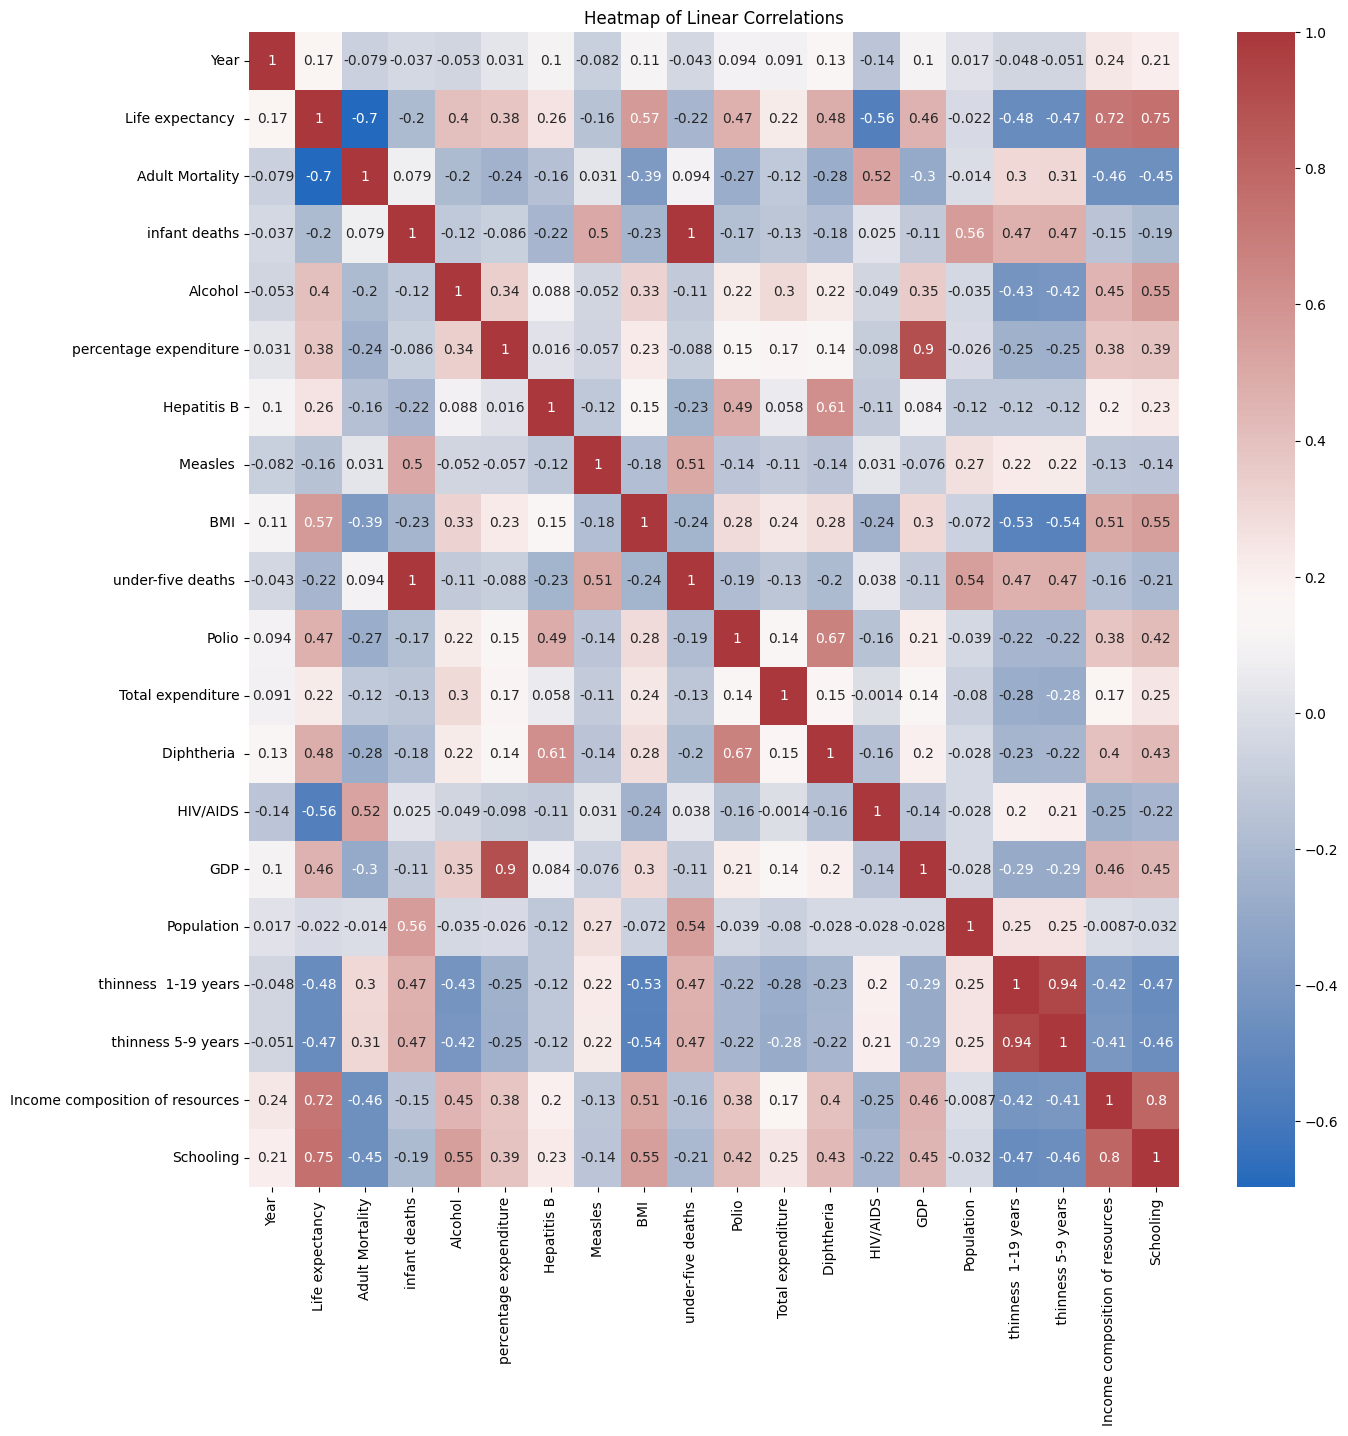

In [6]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlations,annot=True,ax=ax,cmap=sns.color_palette("vlag",as_cmap=True)).set_title("Heatmap of Linear Correlations")
# fig.savefig("heatmap.png")

5.4865131049868525
Score:0.2800380693026723
5.610239358226532


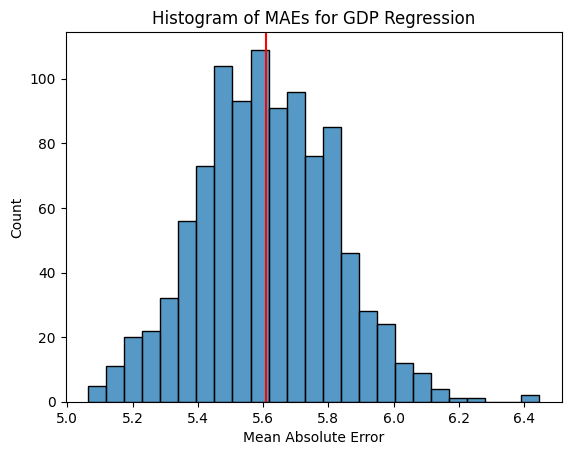

In [16]:
data_no_missing = data.dropna()

X = data_no_missing[['GDP']]
y = data_no_missing['Life expectancy ']

results_1 = []
scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y)

    pipe = Pipeline([
        ('log',FunctionTransformer(np.log)),
        ('linear', LinearRegression())
    ])
    model = pipe
    model.fit(X_train, y_train)
    results_1.append(mean_absolute_error(y_test,model.predict(X_test)))
    if i == 0:
        print(mean_absolute_error(y_test,model.predict(X_test)))
    scores.append(model.score(X_test,y_test))



print("Score:" + str(np.mean(scores)))

gdp_graph = sns.histplot(results_1)
gdp_graph.set_xlabel("Mean Absolute Error")
gdp_graph.set_title("Histogram of MAEs for GDP Regression")
print(np.mean(results_1))
plt.axvline(np.mean(results_1),c="red")
# plt.text(np.mean(results)+0.025,max(gdp_graph.containers[0]),str(np.round(np.mean(results),2)),c="red")
gdp_graph.figure.savefig("Single_Regression.png")

In [104]:
gdp_graph.containers[0]

<BarContainer object of 24 artists>

3.080506316626621
Score:0.8057404718665979
2.9362784386764713


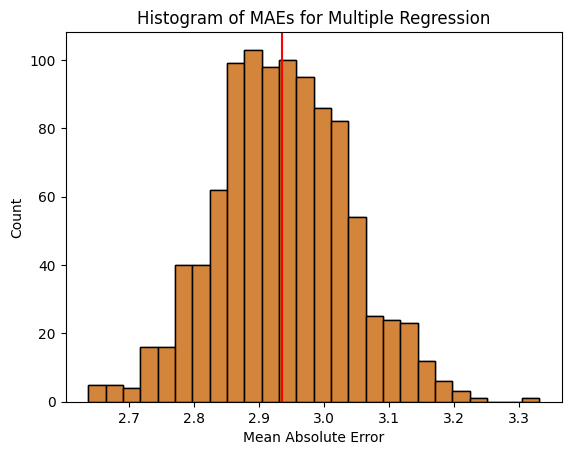

In [17]:

X = data_no_missing[['Adult Mortality','Schooling','Income composition of resources',' HIV/AIDS']]
y = data_no_missing['Life expectancy ']

results_2 = []
scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y)

    model = LinearRegression()
    model.fit(X_train, y_train)
    results_2.append(mean_absolute_error(y_test,model.predict(X_test)))
    if i == 0:
        print(mean_absolute_error(y_test,model.predict(X_test)))
    scores.append(model.score(X_test,y_test))

print("Score:" + str(np.mean(scores)))

sns.histplot(results_2)
multi_graph = sns.histplot(results_2)
multi_graph.set_xlabel("Mean Absolute Error")
multi_graph.set_title("Histogram of MAEs for Multiple Regression")
print(np.mean(results_2))
plt.axvline(np.mean(results_2),c="red")
multi_graph.figure.savefig("multi_regression.png")


In [106]:
import scipy.stats as st

st.ttest_ind(results_1,results_2,equal_var=False)

TtestResult(statistic=360.6376913640581, pvalue=0.0, df=1503.1068638679071)

<Axes: xlabel='GDP', ylabel='Life expectancy '>

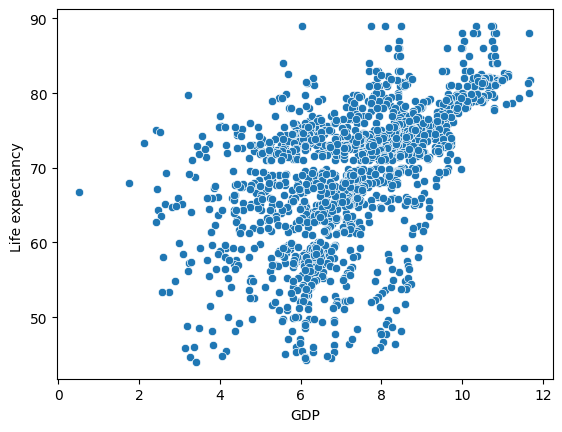

In [45]:
sns.scatterplot(x=np.log(data_no_missing['GDP']),y=data_no_missing['Life expectancy '])

<Axes: xlabel='GDP', ylabel='Life expectancy '>

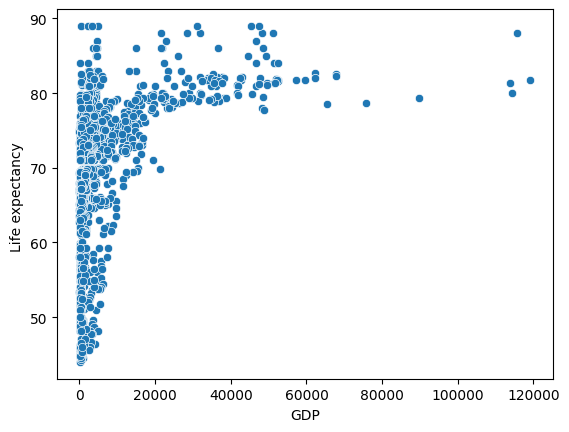

In [86]:
sns.scatterplot(x=data_no_missing['GDP'],y=data_no_missing['Life expectancy '])